In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn.shape 

(2477, 2)

In [3]:
afinn.head() 

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [4]:
import string
import spacy

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline


In [5]:
elon=pd.read_csv("Elon_musk.csv")
elon

,Unnamed: 0,Text
0,1,@kunalb11 I�m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [6]:
affinity_scores = afinn.set_index('word')['value'].to_dict() 

In [41]:
!python -m spacy download en

[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the full
pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


2021-10-20 11:42:00.761378: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2021-10-20 11:42:00.761378: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [42]:
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score 

In [43]:
calculate_sentiment(text = 'amazing') 

4

In [45]:
elon['sentiment_value'] = elon['Text'].apply(calculate_sentiment) 

In [46]:
elon['word_count'] = elon['Text'].str.split().apply(len)
elon['word_count'].head(10) 

0     4
1    13
2     4
3     4
4    17
5     7
6    14
7     6
8    11
9     8
Name: word_count, dtype: int64

In [47]:
elon

,Unnamed: 0,Text,sentiment_value,word_count
0,1,@kunalb11 I�m an alien,0,4
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,0,13
2,3,@joerogan @Spotify Great interview!,3,4
3,4,@gtera27 Doge is underestimated,-1,4
4,5,@teslacn Congratulations Tesla China for amazi...,4,17
...,...,...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n...",-3,23
1995,1996,@PPathole Make sure to read ur terms &amp; con...,1,12
1996,1997,@TeslaGong @PPathole Samwise Gamgee,0,4
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...,0,7


In [48]:
elon.sort_values(by='sentiment_value').tail(10)

,Unnamed: 0,Text,sentiment_value,word_count
1097,1098,@Kristennetten @flcnhvy One of my favorite wri...,7,19
514,515,"@Space_Station @SpaceX Wow, Station looks amaz...",8,6
1966,1967,@nichegamer I didn�t mind DA2. DA1 was awesome...,8,16
1786,1787,@flcnhvy @yourfavgas @ajtourville I really wan...,8,19
1172,1173,Thanks Tesla Team for great work on deliveries...,10,20
468,469,@picot_john @CyberpunkGame It�s a good to grea...,10,20
1357,1358,Great trip to Germany. Support from government...,10,12
458,459,@teslaownerssv It will get absurdly good. Tesl...,10,18
1304,1305,"One way or another, excitement guaranteed! Sup...",11,17
1388,1389,"@GerberKawasaki Wow, I super loved astronomy (...",12,20


In [49]:
elon['sentiment_value'].describe() 

count    1999.000000
mean        0.669835
std         1.745019
min        -7.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        12.000000
Name: sentiment_value, dtype: float64

In [50]:
elon[elon['sentiment_value']<=0].head() 

,Unnamed: 0,Text,sentiment_value,word_count
0,1,@kunalb11 I�m an alien,0,4
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,0,13
3,4,@gtera27 Doge is underestimated,-1,4
5,6,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,0,7
6,7,"Frodo was the underdoge,\nAll thought he would...",-2,14


In [53]:
elon[elon['sentiment_value']>=10].head() 

,Unnamed: 0,Text,sentiment_value,word_count
458,459,@teslaownerssv It will get absurdly good. Tesl...,10,18
468,469,@picot_john @CyberpunkGame It�s a good to grea...,10,20
1172,1173,Thanks Tesla Team for great work on deliveries...,10,20
1304,1305,"One way or another, excitement guaranteed! Sup...",11,17
1357,1358,Great trip to Germany. Support from government...,10,12


In [54]:
elon['index']=range(0,len(elon)) 

C:\Users\Abhinav\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

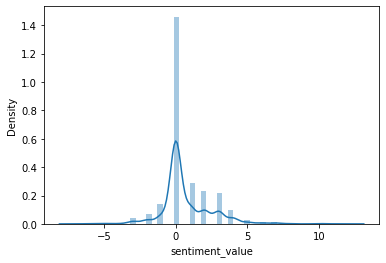

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(elon['sentiment_value']) 

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

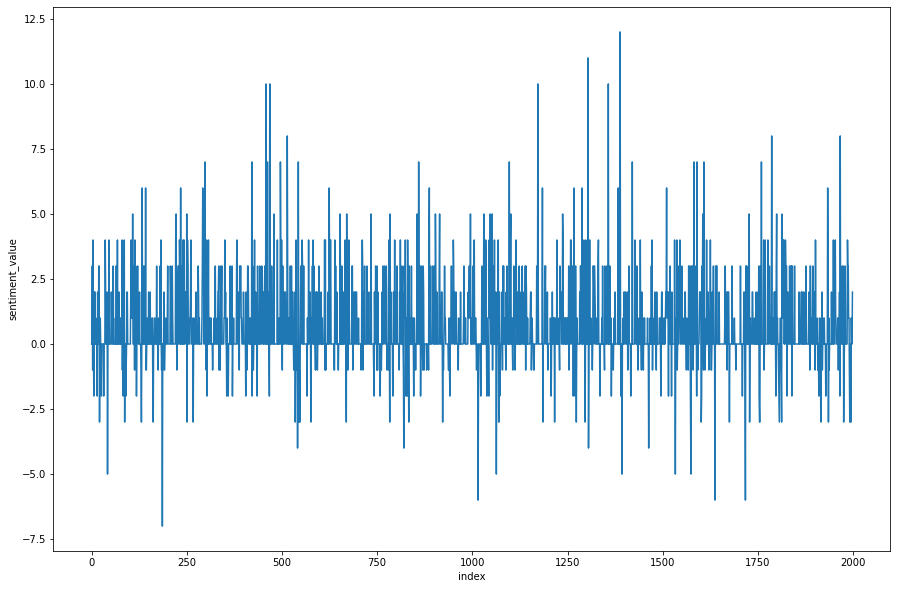

In [56]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=elon) 

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

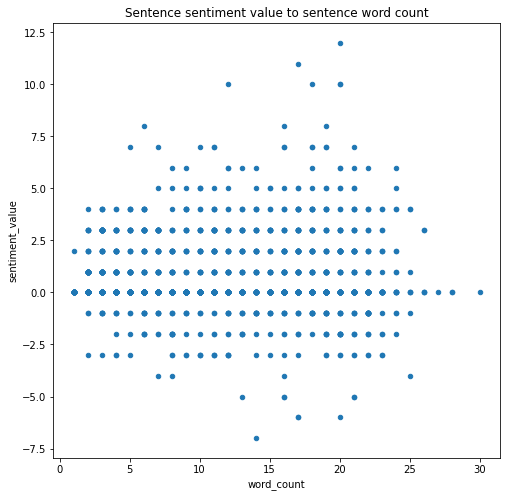

In [57]:
elon.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')

In [58]:
#emotion mining on e-commerce reviews

In [62]:
apple=pd.read_csv("apple.txt",error_bad_lines=False)
apple = [x.strip() for x in apple.x] 
apple = [x for x in apple if x] 

b'Skipping line 6: expected 1 fields, saw 14\n'


In [66]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Abhinav\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [67]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(apple))
sentences[5:15] 

['), all printers are not compatible (e.g.',
 "the most economical MFD laser printer RICOH SP 111 can't be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you master it by working on these (still mostly the document and slides either do not open in windows environment or have distortion issues).",
 'you need to spend extra for an external CD writer and tp buy a carry bag.',
 'Mac con not be connected to most of the projectors unless you buy some connectors, which are expensive and theres no clarity which one to buy and from where.',
 "you can't connect it to your TV, the ports are different and again theres no clarity - customer support, manuals or help section are silent !",
 'Marketing strategy for Indian market, if at all has been planned, has been very bad.',
 'If these critical issues (and a few more not mentioned here) are handled properly, the Mac can sweep away other laptops in India.',
 "Presently, it doesn't seem to be happening.Overall V

In [68]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df 

,sentence
0,It's amazing..... battery last around 10 -12 h...
1,Got it in 50k in Diwali sale.
2,Technically good laptop.Good News.luxury produ...
3,Terrific sense of possession & pride.Bad News.
4,Problems will be there if you are switching fr...
...,...
182,You can get one of the best movie experiences ...
183,Overall I would it a 4.5/5.
184,"I got a great deal on this laptop, which I hav..."
185,I got it not only on discount but also was abl...


In [69]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [70]:
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score 

In [71]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment) 

In [72]:
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count'].head(10) 
sent_df

,sentence,sentiment_value,word_count
0,It's amazing..... battery last around 10 -12 h...,7,17
1,Got it in 50k in Diwali sale.,0,7
2,Technically good laptop.Good News.luxury produ...,5,31
3,Terrific sense of possession & pride.Bad News.,4,7
4,Problems will be there if you are switching fr...,-11,65
...,...,...,...
182,You can get one of the best movie experiences ...,3,12
183,Overall I would it a 4.5/5.,0,6
184,"I got a great deal on this laptop, which I hav...",3,18
185,I got it not only on discount but also was abl...,0,18


In [73]:
sent_df.sort_values(by='sentiment_value').tail(10) 

,sentence,sentiment_value,word_count
106,I am satisfied to get the marvel of a tech in ...,5,13
110,"The build is super strong, the operating syste...",5,10
45,Now my mac is perfectly fine : Got the Apple M...,5,27
46,Ships with macOS sierra but update is availabl...,6,86
64,I hope this comment can help to save somebody’...,6,10
103,The switch was inspired by the awesome reviews...,6,13
59,I use this for music production and it works a...,7,30
0,It's amazing..... battery last around 10 -12 h...,7,17
151,..So now I m working with the external keyboar...,17,113
86,"All are Gud.. For now.. Apple,apple,apple, tha...",24,184


In [74]:
sent_df['sentiment_value'].describe() 

count    187.000000
mean       0.893048
std        3.342349
min      -11.000000
25%       -0.500000
50%        0.000000
75%        3.000000
max       24.000000
Name: sentiment_value, dtype: float64

In [75]:
sent_df[sent_df['sentiment_value']<=0].head() 

,sentence,sentiment_value,word_count
1,Got it in 50k in Diwali sale.,0,7
4,Problems will be there if you are switching fr...,-11,65
5,"), all printers are not compatible (e.g.",0,7
7,you need to spend extra for an external CD wri...,0,16
10,"Marketing strategy for Indian market, if at al...",-3,15


In [76]:
sent_df[sent_df['sentiment_value']>=15].head() 

,sentence,sentiment_value,word_count
86,"All are Gud.. For now.. Apple,apple,apple, tha...",24,184
151,..So now I m working with the external keyboar...,17,113


In [77]:
sent_df['index']=range(0,len(sent_df)) 

C:\Users\Abhinav\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

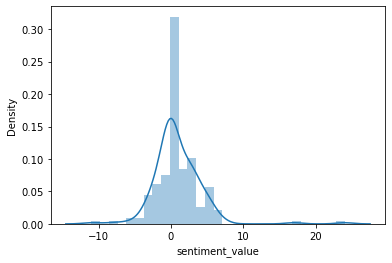

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value']) 

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

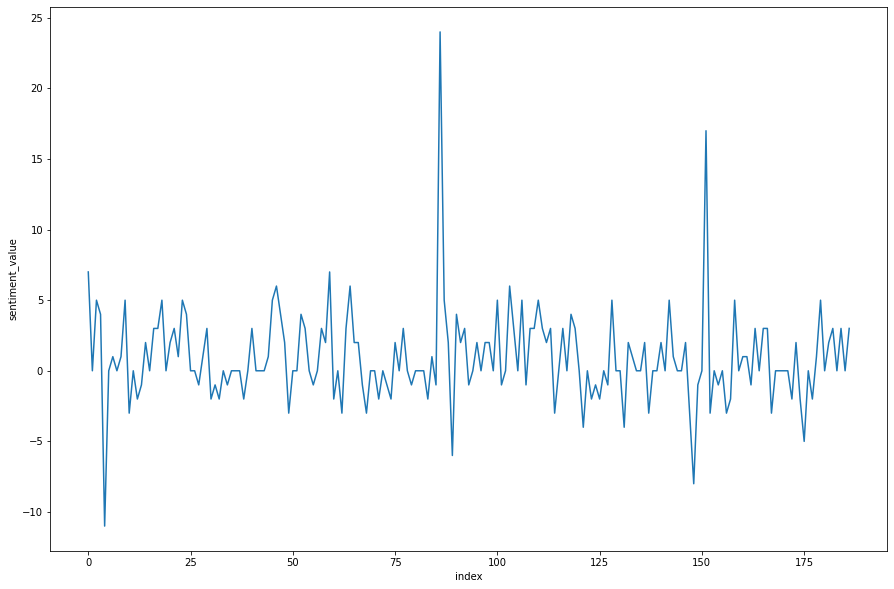

In [79]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df) 

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

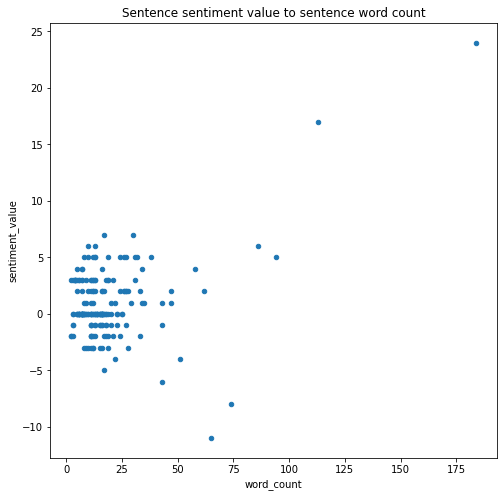

In [80]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')